In [817]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from scipy.stats import norm
import netCDF4 as n4
import xarray
from scipy.interpolate import griddata
%run define.ipynb

In [818]:
jmx=101; #102
delx = 2.0/jmx;
x = np.arange(-1.0+delx/2,1.0,delx)
print(len(x))
phi = 180/np.pi*np.arcsin(x)

cp = 1004
L = 2.5e6

CMIP5 = io.loadmat('PI_fourx_annual_AHT_TS.mat')
x_lat = CMIP5['lat'][0]
mask = [0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15]

101


In [898]:
np.mean(FX_ASR-FX_OLR)

2.1367256981448883

In [819]:
PI_ASR = []
PI_OLR = []
FX_ASR = []
FX_OLR = []
T_pert = []
pert_divH = []
pert_divF = []

for i in mask:
    PI_T_i = griddata(x_lat, CMIP5['PI_T925'][i], phi, method='linear')
    PI_Q_i = griddata(x_lat, CMIP5['PI_Q925'][i], phi, method='linear')
    PI_F_i = griddata(x_lat, CMIP5['PI_AHT'][i], phi, method='linear') * 1e15
    PI_H_i = griddata(x_lat, CMIP5['PI_OHT'][i], phi, method='linear') * 1e15
    PI_ASR_i = griddata(x_lat, CMIP5['PI_ASR'][i], phi, method='linear')
    PI_OLR_i = griddata(x_lat, CMIP5['PI_OLR'][i], phi, method='linear')
    PI_SHF_i = griddata(x_lat, CMIP5['PI_SHF'][i], phi, method='linear')
    FX_T_i = griddata(x_lat, CMIP5['FX_T925'][i], phi, method='linear')
    FX_Q_i = griddata(x_lat, CMIP5['FX_Q925'][i], phi, method='linear')
    FX_F_i = griddata(x_lat, CMIP5['FX_AHT'][i], phi, method='linear') * 1e15
    FX_H_i = griddata(x_lat, CMIP5['FX_OHT'][i], phi, method='linear') * 1e15
    FX_ASR_i = griddata(x_lat, CMIP5['FX_ASR'][i], phi, method='linear')
    FX_OLR_i = griddata(x_lat, CMIP5['FX_OLR'][i], phi, method='linear')
    FX_SHF_i = griddata(x_lat, CMIP5['FX_SHF'][i], phi, method='linear')
    pert_T_i = FX_T_i - PI_T_i
    pert_Q_i = FX_Q_i - PI_Q_i
    pert_F_i = FX_F_i - PI_F_i
    pert_H_i = FX_H_i - PI_H_i
    pert_ASR_i = FX_ASR_i - PI_ASR_i
    pert_OLR_i = FX_OLR_i - PI_OLR_i
    pert_SHF_i = FX_SHF_i - PI_SHF_i
    PI_theta_e_i = 1/cp*(cp*PI_T_i + L*PI_Q_i)
    FX_theta_e_i = 1/cp*(cp*FX_T_i + L*FX_Q_i)
    PI_divF_i = Div(x, PI_F_i)
    PI_divH_i = Div(x, PI_H_i)
    FX_divF_i = Div(x, FX_F_i)
    FX_divH_i = Div(x, FX_H_i)
    pert_divF_i = FX_divF_i - PI_divF_i
    pert_divH_i = FX_divH_i - PI_divH_i
    pert_theta_e_i = FX_theta_e_i - PI_theta_e_i
    PI_ASR.append(PI_ASR_i)
    PI_OLR.append(PI_OLR_i)
    FX_ASR.append(FX_ASR_i)
    FX_OLR.append(FX_OLR_i)
    T_pert.append(pert_T_i)
    pert_divH.append(pert_divH_i)
    pert_divF.append(pert_divF_i)
PI_ASR = np.array(PI_ASR)
PI_OLR = np.array(PI_OLR)
FX_ASR = np.array(FX_ASR)
FX_OLR = np.array(FX_OLR)
T_pert = np.array(T_pert)
pert_divH = np.array(pert_divH)
pert_divF = np.array(pert_divF)

In [741]:
#np.mean(T_pert)
G = np.mean(pert_divH, axis=0)
divF_pert = np.mean(pert_divF, axis=0)
N = np.nanmean((FX_ASR - FX_OLR)-(PI_ASR - PI_OLR), axis=0)-G
T_pert_1 = pert_T_i
slope, intercept, r_value, p_value, std_err = linregress(T_pert_1[18:-18], N[18:-18])

# Print results
print("Slope:", slope)
print("Intercept:", intercept)
#plt.plot(np.array([min(pert_T_4[lat_bound:-lat_bound]),max(pert_T_4[lat_bound:-lat_bound])]),np.array([min(pert_T_4[lat_bound:-lat_bound]),max(pert_T_4[lat_bound:-lat_bound])])*slope+intercept)
print("R-squared:", r_value**2)

Slope: -1.3018854449907076
Intercept: 7.646694596443728
R-squared: 0.06727666828233236


In [752]:
print(np.mean((FX_ASR - FX_OLR)-(PI_ASR - PI_OLR)-(pert_divF+pert_divH), axis=0))


[1.00472782 1.46443598 1.67456363 1.78124438 2.14655462 1.53280557
 1.39491722 1.49660176 1.47635637 1.45815488 1.49286128 1.53454847
 1.54073224 1.54028715 1.54630166 1.57239021 1.55738834 1.56395964
 1.55933837 1.57656838 1.56226595 1.54375917 1.54856044 1.548832
 1.55939691 1.5511005  1.55046671 1.54813598 1.55582202 1.55659053
 1.55165054 1.54705981 1.55309522 1.54856014 1.54997803 1.54786299
 1.54454248 1.54907017 1.53235395 1.54689714 1.55261834 1.55250513
 1.56674846 1.53482775 1.53347208 1.55254772 1.5420443  1.59851416
 1.56742783 1.61528912 1.58711325 1.63789122 1.55944305 1.58311448
 1.55206639 1.55690089 1.54064335 1.55585043 1.56138979 1.55700848
 1.54652957 1.54374359 1.54582207 1.55657719 1.54957758 1.5518677
 1.55497484 1.55636372 1.55590507 1.55569263 1.5547138  1.55665049
 1.5576875  1.52962607 1.55545994 1.55978282 1.55066646 1.54479429
 1.55322765 1.55086556 1.55746439 1.56416262 1.55895434 1.54242486
 1.57288598 1.51309067 1.54961187 1.56644035 1.54304602 1.5276063

[        nan -1.18352056 -0.68212363 -0.34345651 -0.37562971 -0.97361283
 -1.76735352 -2.32341774 -2.69874828 -2.86289147 -2.79444292 -2.61649338
 -2.4142081  -2.21557581 -2.04326833 -1.91454814 -1.83694194 -1.79216574
 -1.7625273  -1.76587772 -1.80919213 -1.86882509 -1.90302078 -1.91719009
 -1.92024686 -1.92263546 -1.92156893 -1.91780931 -1.9149312  -1.92555259
 -1.95012391 -1.97460033 -1.99527224 -2.00578127 -2.00480408 -1.99779302
 -1.99041318 -1.9681378  -1.92250759 -1.85779439 -1.78151337 -1.69536377
 -1.58903493 -1.44870481 -1.29706263 -1.14587722 -0.98578853 -0.82850176
 -0.6642448  -0.54345371 -0.54405982 -0.61706328 -0.73659382 -0.86814016
 -0.96335065 -1.05885314 -1.15504362 -1.25333612 -1.34796334 -1.42918439
 -1.50321849 -1.55245362 -1.58362862 -1.6114175  -1.61973263 -1.61383392
 -1.60194873 -1.5872223  -1.57639101 -1.57498224 -1.57166438 -1.56247009
 -1.55949956 -1.55448636 -1.52210598 -1.48954789 -1.48076513 -1.4676133
 -1.43009345 -1.38118418 -1.32976919 -1.30014903 -1.

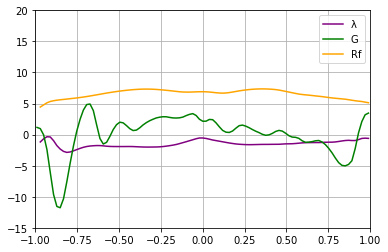

In [809]:
PI_OLR_mean = np.mean(PI_OLR, axis=0)
pert_netTOA = np.mean(FX_ASR-PI_OLR)
Frc = PI_OLR_mean/np.mean(PI_OLR_mean)*pert_netTOA*np.log(4.0)
net = np.mean(pert_divF+pert_divH, axis=0)
T_pert_1 = np.mean(T_pert, axis=0)
Fb = (net - Frc)/T_pert_1
G = np.mean(pert_divH, axis=0)
divF_pert = np.mean(pert_divF, axis=0)
Rf = divF_pert - T_pert_1*Fb+ G
plt.plot(x,Fb, label = 'λ', color = 'purple')
plt.plot(x,-G, label = 'G', color = 'green')
plt.plot(x,Rf, label = 'Rf', color = 'orange')
print(Fb)

plt.legend()
plt.ylim(-15,20)
plt.xlim(-1,1)
plt.grid()

In [837]:
matLabData = io.loadmat('CMIP5_Rf_G_lambda.mat') #feedback, forcing and heat uptake for 11 models
CMIP5_lat = np.asarray(matLabData['CMIP5_lat']) #latitude
CMIP5_T = np.asarray(matLabData['CMIP5_T']) #Temperature change
CMIP5_lambda = np.asarray(matLabData['CMIP5_lambda']) #Radiative feedback
CMIP5_Rf = np.asarray(matLabData['CMIP5_Rf']) #Radiative forcing
#G_frc = griddata(CMIP5_lat,np.mean(CMIP5_G,axis=1),phi, method='linear'); #ocean heat uptake (needed for Evaporation below)
CMIP5_G = np.asarray(matLabData['CMIP5_G']) #Ocean heat uptake
B = -griddata(CMIP5_lat,np.mean(CMIP5_lambda,axis=1),phi, method='linear'); #taking average over the 13 CMIP5 models

R_frc = griddata(CMIP5_lat,np.mean((CMIP5_Rf),axis=1),phi, method='linear'); #CO2 forcing Rf plus ocean heat uptake G
G_frc = griddata(CMIP5_lat,np.mean((CMIP5_G),axis=1),phi, method='linear'); #CO2 forcing Rf plus ocean heat uptake G


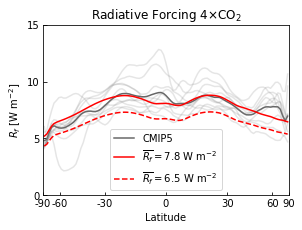

In [918]:
fig = plt.figure(figsize = (4,3))
plt.plot(x, R_frc, color = '0.4',label='CMIP5')
for i in range(10):
    plt.plot(x, griddata(CMIP5_lat.flatten(),CMIP5_Rf.T[i],phi, method='linear'), color = 'grey', alpha = .2)
plt.plot(x, np.mean(FX_OLR, axis=0)/np.mean(FX_OLR)*7.8, color = 'red', label = '$\overline{R_f} = 7.8 $ W m$^{-2}$')
plt.plot(x, np.mean(FX_OLR, axis=0)/np.mean(FX_OLR)*6.5, color = 'red', label = '$\overline{R_f} = 6.5 $ W m$^{-2}$', linestyle = '--')

plt.ylim(0,15)
plt.xlim(-1,1)
plt.title('')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.yticks([0,5,10,15])
plt.xticks([-1,-0.866,-0.5,0,0.5,0.866,1], [-90,-60,-30,0,30,60,90])
plt.xlabel('Latitude')
plt.ylabel(r'$R_f $ [W m$^{-2}$]')
plt.title('Radiative Forcing 4×CO$_{2}$')
plt.legend()
fig.tight_layout(pad=0, w_pad=0, h_pad=0)
fig.savefig('Supplement_1.png',dpi=300)

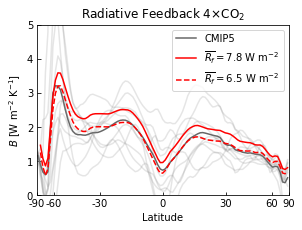

In [920]:
Rf_estimate_65 = np.mean(FX_OLR, axis=0)/np.mean(FX_OLR)*6.5
Rf_estimate_78 = np.mean(FX_OLR, axis=0)/np.mean(FX_OLR)*7.8

B_estimate_65 = (pert_divF + pert_divH - Rf_estimate_65)/T_pert
B_estimate_78 = (pert_divF + pert_divH - Rf_estimate_78)/T_pert

fig = plt.figure(figsize = (4,3))
plt.plot(x, -griddata(CMIP5_lat,np.mean(CMIP5_lambda,axis=1),phi, method='linear'), color = '0.4',label='CMIP5')
for i in range(10):
    plt.plot(x, -griddata(CMIP5_lat.flatten(),CMIP5_lambda.T[i],phi, method='linear'), color = 'grey', alpha = .2)
plt.plot(x, -np.mean(B_estimate_78, axis = 0), color = 'red', label = '$\overline{R_f} = 7.8 $ W m$^{-2}$')
plt.plot(x, -np.mean(B_estimate_65, axis = 0), color = 'red', label = '$\overline{R_f} = 6.5 $ W m$^{-2}$', linestyle = '--')

plt.ylim(0,5)
plt.xlim(-1,1)
plt.title('')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.yticks([0,1,2,3,4,5])
plt.xticks([-1,-0.866,-0.5,0,0.5,0.866,1], [-90,-60,-30,0,30,60,90])
plt.xlabel('Latitude')
plt.ylabel(r'$B $ [W m$^{-2}$ K$^{-1}$]')
plt.title('Radiative Feedback 4×CO$_{2}$')
plt.legend()
fig.tight_layout(pad=0, w_pad=0, h_pad=0)
fig.savefig('Supplement_2.png',dpi=300)

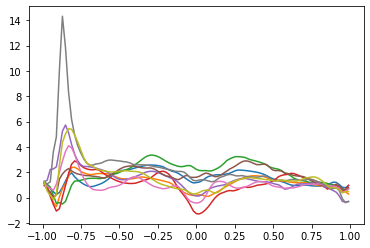

In [780]:
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[0],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[1],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[2],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[3],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[4],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[5],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[6],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[7],phi, method='linear'))
plt.plot(x,-griddata(CMIP5_lat,CMIP5_lambda.T[8],phi, method='linear'))


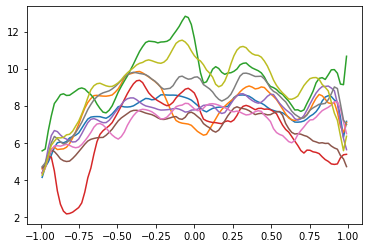

In [782]:
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[0],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[1],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[2],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[3],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[4],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[5],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[6],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[7],phi, method='linear'))
plt.plot(x,griddata(CMIP5_lat,CMIP5_Rf.T[8],phi, method='linear'))

In [31]:
FX_T_1 = griddata(x_lat, np.nanmean(CMIP5['FX_T925'][[0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15]], axis = 0), phi, method='linear')

<ipython-input-31-dbd55d9ebbfb>:1: RuntimeWarning: Mean of empty slice
  FX_T_1 = griddata(x_lat, np.nanmean(CMIP5['FX_T925'][[0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15]], axis = 0), phi, method='linear')


In [182]:
FX_T_1 - PI_T_1

array([ 2.80800925,  4.54764213,  4.5756168 ,  4.21210585,  3.52724281,
        2.50494654,  2.04713012,  1.87983113,  1.83469665,  1.85006177,
        1.90495   ,  1.98093058,  2.06768511,  2.14859205,  2.21743524,
        2.27026416,  2.31967073,  2.369053  ,  2.40373361,  2.45258628,
        2.50373943,  2.5536435 ,  2.65587522,  2.77783099,  2.86064352,
        2.94376057,  3.02043375,  3.09116181,  3.15637302,  3.19837698,
        3.25332949,  3.28826821,  3.33530147,  3.37745373,  3.44396324,
        3.48967987,  3.52028004,  3.57244939,  3.6572906 ,  3.73379027,
        3.8234436 ,  3.92696016,  4.0460799 ,  4.16776389,  4.28282081,
        4.35409428,  4.45151051,  4.5262978 ,  4.54081282,  4.5188562 ,
        4.51049485,  4.48748288,  4.45285932,  4.40405177,  4.31155662,
        4.2442297 ,  4.26521841,  4.24999636,  4.22011203,  4.23506841,
        4.27293347,  4.34874314,  4.45204875,  4.58271845,  4.71307276,
        4.84607141,  4.91277595,  4.95834873,  5.02235425,  5.07